In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [6]:
X = np.matrix([[1,1000,10],[1,2000,30],[1,4500,60],[1,5000,80]])
Y = np.matrix([[10],[15],[30],[50]])
XT = X.T

In [7]:
print(XT)

[[   1    1    1    1]
 [1000 2000 4500 5000]
 [  10   30   60   80]]


In [8]:
XTX_inv = np.dot(XT,X).I

In [9]:
XTX_inv

matrix([[ 1.37333333e+00, -1.14666667e-03,  5.46666667e-02],
        [-1.14666667e-03,  3.09333333e-06, -1.89333333e-04],
        [ 5.46666667e-02, -1.89333333e-04,  1.19333333e-02]])

In [10]:
theta = np.dot(XTX_inv,np.dot(XT,Y))
theta

matrix([[ 4.   ],
        [-0.008],
        [ 1.05 ]])

In [11]:
y_hat = np.dot(X,theta)
y_hat

matrix([[ 6.5],
        [19.5],
        [31. ],
        [48. ]])

In [15]:
ep = Y - y_hat
ep

matrix([[ 3.5],
        [-4.5],
        [-1. ],
        [ 2. ]])

In [18]:
ssr = np.dot(ep.T,ep)

In [19]:
ssr

matrix([[37.5]])

<IPython.core.display.Javascript object>


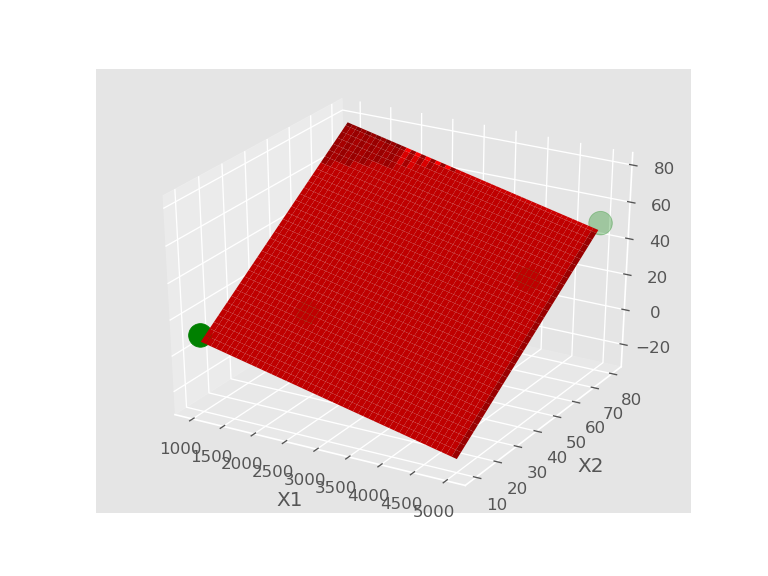

In [25]:
plt3d = plt.figure().gca(projection ='3d')
X1 = np.array(X[:,1])
X2 = np.array(X[:,2])
xx,yy = np.meshgrid(range(min(X1)[0],max(X1)[0]),
                   range(min(X2)[0],max(X2)[0]))
plt3d.scatter(np.array(X[:,1]),np.array(X[:,2]),
             np.array(Y[:,0]),color='g',s=200)
plt3d.plot_surface(xx,yy,np.array(theta[0,0]+theta[1,0]*xx+theta[2,0]*yy),color='r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [26]:
def make_X_mat(dataset):
    X=[]
    for i in range(len(dataset)):
        X.append([1])
        X[i]+=(dataset[i])
    return np.matrix(X)

In [27]:
def predict(X,B):
    return(np.dot(X,B))

In [29]:
def get_theta(X,Y):
    XT=X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv,np.dot(XT,Y))